In [186]:
import numpy as np
import pandas as pd

import datetime
import re
import os
import json
import matplotlib.pyplot as plt

import matplotlib.patches as patches

import matplotlib as mplt

%matplotlib inline

import codecs
import itertools
import xml.etree.ElementTree as ET
#from matplotlib import interactive
#interactive(True)
 

from pprint import pprint
from .misc import binsig_to_intervals,generate_events,get_timeline_clipping,left_trim_samples,

<pre>


"signals" :{
    "Signal_1":{
        "pretty_print":"Sig1",
        "newName":"Sig1",
        "xAxis":[-0.010000000009313226,62.820000000006985,131.48000000001048,150,259.47000000000116],
        "values":[0,16.666666666666664,-2.7777777777777777,2,0]
        },
    "Signal_2":{
        "pretty_print":"Sig2",
        "newName":"Sig2",
        "xAxis":[-0.010000000009313226,62.820000000006985,131.48000000001048,150,259.47000000000116],
        "values":[0,16.666666666666664,-2.7777777777777777,2,0]
        },
    "TimeStamps":{}
},

</pre>

In [650]:
# From http://localhost:8890/notebooks/DRS_Mutation/Tears-operator-regression-test.ipynb

def generate_events(n = 3,unique = True):
    
    i = np.random.randint(5)
    res = [i]
    while len(res)<n:
        while i == res[-1:][0]:
            i += np.random.randint(5)
        res.append(i)
        n = n -1
    if unique:
        return sorted(set(res))
    else:
        return res

{'Signal_0': {'pretty_print': 'Signal_0',
  'newName': 'Signal_0',
  'xAxis': [3, 6, 10, 11, 12, 16],
  'values': [1, 0, 0, 0, 0, 1]},
 'Signal_1': {'pretty_print': 'Signal_1',
  'newName': 'Signal_1',
  'xAxis': [4, 6, 7, 9, 11, 14],
  'values': [1, 0, 0, 1, 1, 1]},
 'Signal_2': {'pretty_print': 'Signal_2',
  'newName': 'Signal_2',
  'xAxis': [2, 6, 9, 12, 13, 14],
  'values': [1, 1, 1, 1, 0, 1]},
 'TimeStamps': {}}

In [327]:
testlog = '/Users/dfm01/Documents/aProjects/napkin/session/log/Athanasios/CTS-007/lab_CTS_007.TXT'

load_ascii_csv_to_jsondiff(fname=testlog,timebase=-1)

{'Signal_0': {'newName': 'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms',
  'pretty_print': 'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms',
  'values': ['0', '4915', '0', '4915', '0'],
  'xAxis': [0,
   0.028904267200500655,
   0.05600375306770111,
   0.0665547824012016,
   0.09048895946840041]},
 'TimeStamps': {},
 'Signal_1': {'newName': 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms',
  'pretty_print': 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms',
  'values': ['0', '4915', '0', '4915', '0'],
  'xAxis': [0,
   0.028904267200500655,
   0.05600375306770111,
   0.0665547824012016,
   0.09048895946840041]},
 'Signal_2': {'newName': 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn',
  'pretty_print': 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn',
  'values': ['0', '1', '0'],
  'xAxis': [0, 0.012439108266899979, 0.09048895946840041]},
 'Signal_3': {'newName': 'MWT.DBC_A_DBC_A_AyCmpr_T3.C2M20m2In8_S_AyPrsOk',
  'pretty_print': 'MWT.DBC_A_DBC_A_AyCmpr_T3.C2M20m2In8_S_AyPrsOk',


TearsParser2.js::resample_signal UnitTest [Passed] 
TearsParser2.js::resample_signal UnitTest [Passed] 
TearsParser2.js::resample_signal UnitTest [Passed] 
TearsParser2.js::resample_signal UnitTest [Passed] 
TearsParser2.js::resample_signal UnitTest [Passed] 


 X1=[1, 4, 5, 9, 12, 15], V1=[1, 1, 0, 0, 1, 0]
 X2=[4, 5, 7, 9, 12, 13], V2=[1, 1, 0, 1, 0, 0]
CMT [1, 4, 5, 7, 9, 12, 13, 15]
RES cc [4, 5, 7, 9, 12, 13]
RES vv [1, 0, 1, 0, 0, 0]


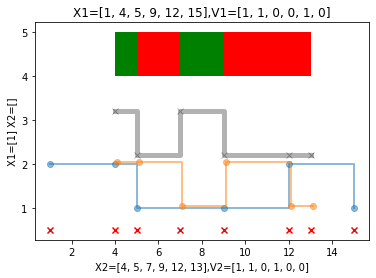

 X1=[1, 4, 5, 9, 10, 13], V1=[0, 0, 0, 0, 1, 0]
 X2=[3, 5, 9, 13, 15, 19], V2=[0, 1, 0, 0, 0, 0]
CMT [1, 3, 4, 5, 9, 10, 13, 15, 19]
RES cc [3, 4, 5, 9, 10, 13]
RES vv [1, 1, 0, 1, 0, 1]


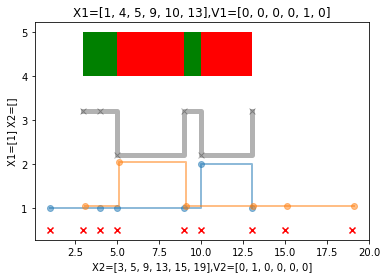

 X1=[4, 5, 7, 9, 11, 13], V1=[0, 1, 0, 0, 1, 0]
 X2=[1, 3, 4, 6, 7, 10], V2=[0, 1, 0, 1, 1, 1]
CMT [1, 3, 4, 5, 6, 7, 9, 10, 11, 13]
RES cc [4, 5, 6, 7, 9, 10]
RES vv [1, 0, 1, 0, 0, 0]


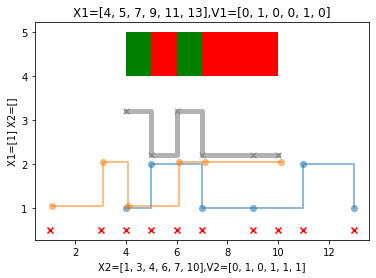

 X1=[3, 4, 8, 12, 16, 19], V1=[0, 1, 0, 1, 1, 1]
 X2=[2, 4, 8, 10, 12, 15], V2=[1, 0, 1, 0, 1, 1]
CMT [2, 3, 4, 8, 10, 12, 15, 16, 19]
RES cc [3, 4, 8, 10, 12, 15]
RES vv [0, 0, 0, 1, 1, 1]


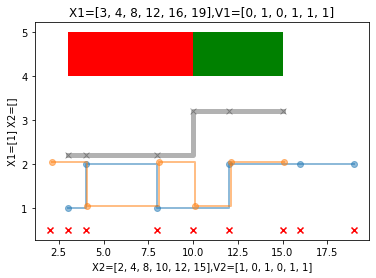

 X1=[3, 5, 7, 9, 12, 14], V1=[0, 1, 1, 1, 1, 0]
 X2=[1, 5, 7, 10, 12, 16], V2=[1, 1, 1, 0, 0, 1]
CMT [1, 3, 5, 7, 9, 10, 12, 14, 16]
RES cc [3, 5, 7, 9, 10, 12, 14]
RES vv [0, 1, 1, 1, 0, 0, 1]


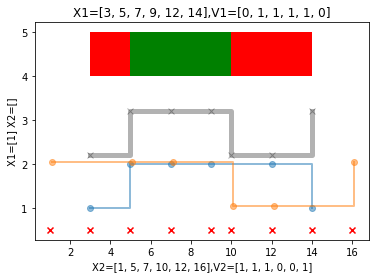

 X1=[3, 4, 7, 9, 13, 16], V1=[0, 1, 1, 1, 1, 1]
 X2=[1, 5, 8, 9, 13, 16], V2=[1, 1, 1, 0, 1, 0]
CMT [1, 3, 4, 5, 7, 8, 9, 13, 16]
RES cc [3, 4, 5, 7, 8, 9, 13, 16]
RES vv [0, 1, 1, 1, 1, 0, 1, 0]


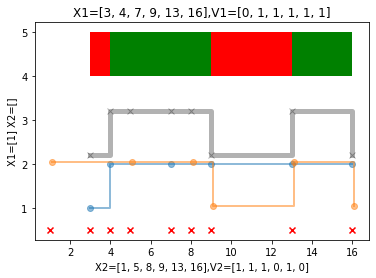

 X1=[3, 4, 5, 7, 10, 14], V1=[1, 1, 0, 0, 0, 1]
 X2=[2, 5, 6, 9, 12, 15], V2=[0, 0, 0, 1, 1, 0]
CMT [2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 15]
RES cc [3, 4, 5, 6, 7, 9, 10, 12, 14]
RES vv [0, 0, 1, 1, 1, 0, 0, 0, 1]


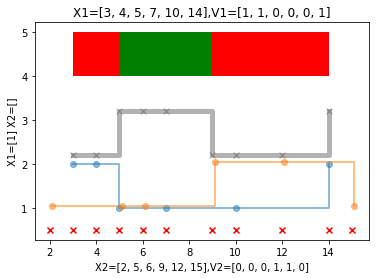

In [768]:
for i in range(0,10):
    log = generate_test_log()
    #display(log)

    X1 = log['Signal_0']['xAxis']
    X2 = log['Signal_1']['xAxis']
    #V1 = np.arange(0,len(X1)) #
    V1 = log['Signal_0']['values']
    V2 = log['Signal_1']['values']
   
    
    # Deal with empty signals
    # If len(X1) == 0 or len(X2) == 0
    
    # Sharpen the test,skipping lines starting at the same point 
    if X1[0]==X2[0]:
        continue
    #X1=[] 
    #X2=[]#[x - 15 for x in X1] # Now testing completely non-overlapping signals
    
    print(f" X1={X1}, V1={V1}")
    print(f" X2={X2}, V2={V2}")
    
    # CASE 1 both signal are empty
    if len(X1)==0 and len(X2)==0:
        # raise exception ?
        raise ValueError("Both signals are empty ")
    if len(X1)==0:
        # operator == --> false during whole X2 ? 
        # operator != --> true during whole X2 ?   NEEDS DISCUSSION...
        raise ValueError(f"X1={X1} is empty, and X2={X2}")
    if len(X2)==0:
        # operator == --> false during whole X1 ? 
        # operator != --> true during whole X1 ?   NEEDS DISCUSSION...
        raise ValueError(f"X2={X2} is empty, and X1={X1}")
        
    # CASE 2 both signals non empty and completely non-overlapping
    x1s,x1e = X1[0], X1[-1:][0] 
    x2s,x2e = X2[0], X2[-1:][0] 
    
    if x1e < x2s or x2e < x1s:
        raise ValueError(f"Signals are not overlapping at all {X1},{X2}")
    
    # CASE 3 
    # Create common timeline. 
    common_timeline = sorted(list(set(X1 + X2)))
    plt.scatter(x=common_timeline,y=[0.5]*len(common_timeline),marker='x',color='r')
    print("CMT",common_timeline)
    
    def project_on_timeline(X1,V1,common_timeline):
        ix1 = 0
        ix2 = 0
        res = []
        
        lasty = None
       
        for t in common_timeline:
            # add None values until this timeline starts
            #     or between end and the end of the common time line
            if t < X1[0] or t > X1[-1:][0] or ix1==len(X1):
                res.append(None)
                continue
            # Now we know t is within the signal timeline

            #Right on spot
            if t == X1[ix1] :
                res.append(V1[ix1])
                ix1 = ix1 + 1
                continue   

            while ix1 < len(X1) and t > X1[ix1]:
                print(f"t={t},X1[ix1]={X1[ix1]}, X1[:ix1]={X1[:ix1]} , t < X1[ix1]={t < X1[ix1]}")
                ix1 = ix1 + 1

            # ix1 is either at end or at the sample 
            # after the one we are interested in

            res.append(V1[ix1-1])
            
        return res
    #common_timeline
    V1c = project_on_timeline(X1,V1,common_timeline)
    V2c = project_on_timeline(X2,V2,common_timeline)
    
    #Construct the result by iterating the common timeline
    # ignoring any None entries
    cc = []
    vv = []
    for i,t in enumerate(common_timeline):
        if V1c[i]==None or V2c[i]==None:
            continue
        cc.append(t)
        vv.append(int(V1c[i] == V2c[i]))
    
    print("RES cc",cc)
    print("RES vv",vv)
    
    #clp1,clp2  = get_timeline_clipping(X1,X2)
    plt.step(x=cc,y=np.array(vv) + 2.2,marker='x',ls="-",where='post',lw=5,color='black',alpha=0.3)
    #plt.step(x=X2,y=np.array(V2) + 1.2,marker='x',ls="--",where='post',lw=1,color='black')
    ix1 = 0
    ix2 = 0
    ax = plt.gca()
    
    res_i = binsig_to_intervals(cc,vv,invert=False)
    for s,e in res_i:
        rect = patches.Rectangle((s, 4), e-s, 1, linewidth=1, edgecolor='none', facecolor='green')
        ax.add_patch(rect)
    
    res_i = binsig_to_intervals(cc,vv,invert=True)
    for s,e in res_i:
        rect = patches.Rectangle((s, 4), e-s, 1, linewidth=1, edgecolor='none', facecolor='red')
        ax.add_patch(rect)
    
    plt.step(x=X1,y=np.array(V1)+1,marker='o',where='post',lw=2,alpha=0.5)
    plt.step(x=np.array(X2)+0.1,y=np.array(V2)+1.05,marker='o',where='post',lw=2,alpha=0.5)
    plt.title(f"X1={X1},V1={V1}")
    plt.xlabel(f"X2={X2},V2={V2}")
    plt.ylabel(f"X1={cut1} X2={cut2}")
    plt.show()
    

[[4, 7], [9, 10]]

In [771]:

#intervals_sum([[4, 7], [9, 10]])

4

In [384]:
# OBSOLETE

#------------------------------------------------------------------------------------------------------
def sig_op_sig(S1,S2,op):
#------------------------------------------------------------------------------------------------------
    '''
    Compares two signals 
    ARGUMENTS
        S1 - Signal
        S2 - Signal
        op - '==', '!=','<','>'
    RETURNS
        intervals where S1 op S2 is True
    
    '''
    compare={'==':lambda a,b : a==b,
             '!=' :lambda a,b : a!=b,
        }
    
    # Corner cases
    # S1 empty or S2 empty 
    #   == -> Result = [] 
    #   != -> 
    #      S1 empty -> Result = [min(S2),max(S2)]
    #   else 
    #               -> Result = [min(S2),max(S2)]
    
    
    if
    
    # Project both signals onto the common time line
    S1 = resample_signal(signal1,common_time_line)
    S2 = resample_signal(signal2,common_time_line)
    
    intervals  = []
    start = -1234;

    for i,t in enumerate(common_time_line):
        #console.log("Comparing ",i,S1[i],operator,S2[i],compare[operator](S1[i],
        #             S2[i]),compare[operator]);
        if compare[operator](S1[i],S2[i]):
            if(start == -1234):
                #console.log("Starting new interval",i)
                start = timeline[i];
            #else: we are already in an interval.

        else: # End the current interval.
            if start == -1234:
                continue; # already in "non-interval"
                #console.log("Ending interval at ",i)

            intervals.append([start,t])

            start = -1234;
        
    if(start != -1234):
        #console.log("Ending interval at ",timeline.length - 1,
        #             timeline[timeline.length - 1])
        intervals.append([start,timeline[-1:][0]]) 

    return intervals

    
#-----------------------------------------------------------------------------------------------------------
    
#-----------------------------------------------------------------------------------------------------------
def unit_test_signal_relOp_signal() :
#-----------------------------------------------------------------------------------------------------------
    
    log = generate_test_log()
    display(log)
    

    res  = sig_op_sig(log['Signal_0'],log['Signal_1'],"==")
    print(res)
    
unit_test_signal_relOp_signal()

{'Signal_0': {'pretty_print': 'Signal_0',
  'newName': 'Signal_0',
  'xAxis': [4, 7, 10, 14, 16, 18],
  'values': [1, 0, 0, 1, 0, 1]},
 'Signal_1': {'pretty_print': 'Signal_1',
  'newName': 'Signal_1',
  'xAxis': [0, 4, 5, 9, 10, 11],
  'values': [0, 1, 1, 1, 1, 0]},
 'Signal_2': {'pretty_print': 'Signal_2',
  'newName': 'Signal_2',
  'xAxis': [0, 3, 7, 8, 9, 11],
  'values': [1, 1, 0, 0, 1, 1]},
 'TimeStamps': {}}

{'pretty_print': 'Signal_0', 'newName': 'Signal_0', 'xAxis': [4, 7, 10, 14, 16, 18], 'values': [1, 0, 0, 1, 0, 1]}
{'pretty_print': 'Signal_1', 'newName': 'Signal_1', 'xAxis': [0, 4, 5, 9, 10, 11], 'values': [0, 1, 1, 1, 1, 0]}


IndexError: list index out of range

In [382]:
lab_signals

{'Signal_0': {'newName': 'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms',
  'pretty_print': 'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms',
  'values': ['0', '4915', '0', '4915', '0'],
  'xAxis': [0,
   0.028904267200500655,
   0.05600375306770111,
   0.0665547824012016,
   0.09048895946840041]},
 'TimeStamps': {},
 'Signal_1': {'newName': 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms',
  'pretty_print': 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms',
  'values': ['0', '4915', '0', '4915', '0'],
  'xAxis': [0,
   0.028904267200500655,
   0.05600375306770111,
   0.0665547824012016,
   0.09048895946840041]},
 'Signal_2': {'newName': 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn',
  'pretty_print': 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn',
  'values': ['0', '1', '0'],
  'xAxis': [0, 0.012439108266899979, 0.09048895946840041]},
 'Signal_3': {'newName': 'MWT.DBC_A_DBC_A_AyCmpr_T3.C2M20m2In8_S_AyPrsOk',
  'pretty_print': 'MWT.DBC_A_DBC_A_AyCmpr_T3.C2M20m2In8_S_AyPrsOk',


In [334]:
lab = '/Users/dfm01/Documents/aProjects/napkin/session/log/Athanasios/CTS-007/lab_CTS_007.TXT'
train = '/Users/dfm01/Documents/aProjects/napkin/session/log/Athanasios/CTS-007/train_CTS-007_105.TXT'

lab_jsondiff  = load_ascii_csv_to_jsondiff(lab, timebase=-1)
train_jsondiff  = load_ascii_csv_to_jsondiff(train,timebase=-1)
lab_jsondiff  = 
train_jsondiff  = load_ascii_csv_to_jsondiff(train,timebase=-1)


# We need to cut the signal sets in time so they have the same time range!

# 1) synchronize (i.e. cut the front of one of the files)
# 2) trim        (i.e. cut the longest and the shortest)
#    we trim both ends because we may need to cut one of the logs at the synchronization point and
#    reset from there...




# From this point we have two sets of signals that are synchronized at t=0
# and forward using some kind of linear time measurement
labmax   = lab_jsondiff  ['Signal_1']['xAxis'][-1:][0]
trainmax = train_jsondiff['Signal_1']['xAxis'][-1:][0]
logmax = min(labmax,trainmax)
labmin = lab_jsondiff['Signal_1']['xAxis'][0]
trainmin = train_jsondiff['Signal_1']['xAxis'][0]
logmin = max(labmin,trainmin)


print(logmin,logmax)
common_timeline = set()
def get_trimmed_signals_dict(jsondiff, tstart,tend):
    res = {}
    for k in jsondiff.keys():
         if "Signal" in k:
            s = jsondiff[k]
            s = left_trim_samples(s,tstart)
            s = right_trim_samples(s,tend)
            res[s['newName']] = s
    return res        
        
 
train =  get_trimmed_signals_dict(train_jsondiff,logmin,logmax)
    
lab =    get_trimmed_signals_dict(lab_jsondiff,logmin,logmax)
    

# Now we have two sets of signals with the same time base and time, end
    
    
    
    



0 0.09048895946840041


{'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms': {'newName': 'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms',
  'pretty_print': 'MWT.TC_BI_LIM1_T3.TC_BI_1LIM_XU_DcLnRms',
  'values': ['0', '4915', '0', '4915', '0'],
  'xAxis': [0,
   0.028904267200500655,
   0.05600375306770111,
   0.0665547824012016,
   0.09048895946840041]},
 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms': {'newName': 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms',
  'pretty_print': 'MWT.TC_BI_LIM2_T3.TC_BI_3LIM_XU_DcLnRms',
  'values': ['0', '4915', '0', '4915', '0'],
  'xAxis': [0,
   0.028904267200500655,
   0.05600375306770111,
   0.0665547824012016,
   0.09048895946840041]},
 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn': {'newName': 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn',
  'pretty_print': 'MWT.DBC_A_DBC_A_AyCmpr_T3.DBC_AV_AyCmprSup_1.DBC_AV_S_AyCmprRn',
  'values': ['0', '1', '0'],
  'xAxis': [0, 0.012439108266899979, 0.09048895946840041]},
 'MWT.DBC_A_DBC_A_AyCmpr_T3.C2M20m2In8_S_AyPrs

In [ ]:
OLD STUFF BELOW, 

In [43]:
# load log file from reliance 


----------------------------------




SyntaxError: invalid syntax (<ipython-input-43-64965a528066>, line 4)